In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from   sklearn.linear_model import LogisticRegression
from   sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score,  plot_precision_recall_curve, plot_confusion_matrix


In [2]:
shark = pd.read_excel("shark_attack_data_cleaned.xlsx", nrows = 1198)

C:\Users\pedro\anaconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:211: UserWarning: Cell A1048576 is marked as a date but the serial value 14707374 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)


In [3]:
shark.sample(10)

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal,Time,Species
674,1997-10-24 00:00:00,1997,Unprovoked,USA,Florida,"North Jetty, Fort Pierce Inlet State Park, St....",Board involved,M,23,0,5.15.00 PM,Unidentified species
916,1979-05-05 00:00:00,1979,Provoked,SOUTH AFRICA,Western Cape Province,"hangklip, False Bay",Fishing,M,25,0,2.00.00 PM,White
1163,1934-12-31 00:00:00,1934,Unprovoked,AUSTRALIA,New South Wales,George’s River at Kentucky,Swimming/Diving,F,13,0,8.15.00 PM,Tiger
950,1974-09-01 00:00:00,1974,Unprovoked,USA,Oregon,Myers Creek,Board involved,M,24,0,Morning,White
325,2008-03-23 00:00:00,2008,Unprovoked,USA,Florida,"South of Ponce de Leon Jetty, New Smyrna Beach...",Swimming/Diving,M,13,0,11.30.00 AM,Unidentified species
880,1983-01-08 00:00:00,1983,Unprovoked,SOUTH AFRICA,Western Cape Province,holbaai,Fishing,M,32,0,1.00.00 PM,White
837,1986-01-12 00:00:00,1986,Unprovoked,USA,Florida,"Singer Island, Riviera Beach, Palm Beach County",Board involved,M,22,0,8.35.00 AM,Blacktip
41,2016-11-28 00:00:00,2016,Provoked,AUSTRALIA,Victoria,Queenscliff,Fishing,M,73,0,11.00.00 AM,Sevengill
708,1995-08-25 00:00:00,1995,Unprovoked,USA,North Carolina,"Off Masonboro Island, New hanover County",Swimming/Diving,M,16,0,Night,Unidentified species
192,2012-03-06 00:00:00,2012,Provoked,AUSTRALIA,Victoria,"Shipwreck Cove, Melbourne Aquarium",Shark involved,F,34,0,11.30.00 AM,Nurse


In [4]:
columns = {} # creating a mapper dictionary to change the names of my columns from uppercase to lowercase, this is just for my ease of use!
for column in shark.columns:
    columns[column] = column.lower()

In [5]:
shark.rename(columns = columns, inplace = True)

In [6]:
shark.info() # printing out general info of our dataframe to see which columns need work

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1198 non-null   object
 1   year      1198 non-null   int64 
 2   type      1198 non-null   object
 3   country   1198 non-null   object
 4   area      1198 non-null   object
 5   location  1198 non-null   object
 6   activity  1198 non-null   object
 7   sex       1198 non-null   object
 8   age       1198 non-null   object
 9   fatal     1198 non-null   int64 
 10  time      1192 non-null   object
 11  species   1198 non-null   object
dtypes: int64(2), object(10)
memory usage: 112.4+ KB


In [7]:
shark.year.describe() #year column seems to be all integer values which is great for now

count    1198.000000
mean     1991.931553
std        23.287287
min      1880.000000
25%      1981.000000
50%      2000.000000
75%      2009.000000
max      2018.000000
Name: year, dtype: float64

In [8]:
shark.type.unique() # from here we can see that there are four values in type, each associated with the type of attack

array(['Unprovoked', 'Provoked', 'Boating', 'Invalid', 'Sea Disaster'],
      dtype=object)

In [9]:
shark.type.value_counts() # here we can see that Unprovoked is the most common kind of attack

Unprovoked      1087
Provoked          89
Boating           15
Sea Disaster       4
Invalid            3
Name: type, dtype: int64

In [10]:
shark.loc[shark.type == "Invalid"] # since there are only three values I will fill in these values with the most frequent value of the four categorical variables

,date,year,type,country,area,location,activity,sex,age,fatal,time,species
109,2015-06-24 00:00:00,2015,Invalid,AUSTRALIA,Western Australia,Denmark,Board involved,F,37,0,9.30.00 AM,White
308,2009-09-12 00:00:00,2009,Invalid,USA,North Carolina,"Corolla, Currituck County",Swimming/Diving,M,60,1,9.00.00 PM,Unidentified species
593,2001-09-16 00:00:00,2001,Invalid,USA,Florida,"2 miles off Pompano Beach, Broward County",Swimming/Diving,M,42,1,1.20.00 PM,Unidentified species


In [11]:
shark.type[[109,308,593]] = "Unprovoked" # updating the values of these 3 entries

C:\Users\pedro\AppData\Local\Temp\ipykernel_5268\3640998759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark.type[[109,308,593]] = "Unprovoked" # updating the values of these 3 entries


In [12]:
shark.type.value_counts() # checking our new value counts for our updated values

Unprovoked      1090
Provoked          89
Boating           15
Sea Disaster       4
Name: type, dtype: int64

In [13]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1198 non-null   object
 1   year      1198 non-null   int64 
 2   type      1198 non-null   object
 3   country   1198 non-null   object
 4   area      1198 non-null   object
 5   location  1198 non-null   object
 6   activity  1198 non-null   object
 7   sex       1198 non-null   object
 8   age       1198 non-null   object
 9   fatal     1198 non-null   int64 
 10  time      1192 non-null   object
 11  species   1198 non-null   object
dtypes: int64(2), object(10)
memory usage: 112.4+ KB


In [14]:
shark["time"].value_counts()

Afternoon      59
11.00.00 AM    55
4.30.00 PM     43
4.00.00 PM     42
Morning        42
               ..
6.50.00 PM      1
1.55.00 PM      1
9.00.00 PM      1
15j45           1
                1
Name: time, Length: 185, dtype: int64

### A lot of work needs to be done to clean up this time column to be ready to convert use a one hot encoder

In [15]:
time_list = ["Early morning", "Just before sundown", "Before 07.00", "Midday", "Early afternoon", "Morning", "After noon", "4/9/1902  12.00.00 AM", "Afternoon", "Morning", "Night", "Evening"]

In [16]:
from datetime import datetime
# defining a function to convert am and pm time to 24 hour time
def strip_am_pm(time_string):
    in_time = datetime.strptime(time_string, "%I:%M %p")
    out_time = datetime.strftime(in_time, "%H:%M")
    return(out_time)

In [17]:
# shark["time"].apply(lambda time: strip_am_pm(time))

In [18]:
shark.head()

,date,year,type,country,area,location,activity,sex,age,fatal,time,species
0,2018-05-26 00:00:00,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Swimming/Diving,M,15,0,5.00 PM,Bull
1,2018-02-15 00:00:00,2018,Unprovoked,AUSTRALIA,New South Wales,"Surf Beach, Kiama",Swimming/Diving,M,35,0,4.00.00 PM,Bull
2,2018-05-24 00:00:00,2018,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Shark involved,M,32,0,Morning,Grey reef
3,2018-03-31 00:00:00,2018,Unprovoked,USA,hawaii,Kukio Beach,Board involved,M,25,0,9.30.00 AM,Tiger
4,2018-03-09 00:00:00,2018,Unprovoked,AUSTRALIA,Victoria,Winkipop,Board involved,M,18,0,7.30.00 AM,Unidentified species


In [19]:
shark.columns

Index(['date', 'year', 'type', 'country', 'area', 'location', 'activity',
       'sex', 'age', 'fatal', 'time', 'species'],
      dtype='object')

In [20]:
shark_clean = shark[['type', 'country', 'activity',
       'sex', 'fatal', 'species']]

In [21]:
X = shark_clean.drop(columns = ["fatal"])
y = shark_clean["fatal"]

In [22]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(drop = "first")

X_encoded = OHE.fit_transform(X)

In [23]:
shark_encoded_age = pd.DataFrame(X_encoded.todense()).join(shark.age)

In [41]:
logistic_model = LogisticRegressionCV()

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42, stratify= y )

model.fit(X_train, y_train) # tell it known stuff

y_predict = model.predict(X_test) # given future input, predict future output!

In [48]:
print(classification_report(y_test, y_predict, output_dict = False
                    ))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       413
           1       0.55      0.34      0.42        67

    accuracy                           0.87       480
   macro avg       0.72      0.65      0.67       480
weighted avg       0.85      0.87      0.86       480



## So lets try to print out our f1 score and see how well our baseline model did?

In [43]:
f1_score(y_test, y_predict) # Not too great!

0.4220183486238532

C:\Users\pedro\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


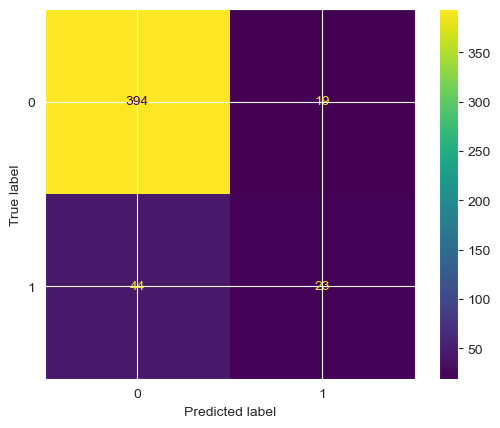

In [46]:
plot_confusion_matrix(model, X_test, y_test) ## remember we are focused on our true positives here and should be focused on prediciting if a shark encounter will indeed be fatal

## Lets try to used a more complicated model